In [25]:
import numpy as np
import matplotlib.pyplot as plt

class Stock :
    def __init__(self, r, σ, s_0, δ, net_income, weighted_average_shares_outstanding):
        self.r = r
        self.σ = σ
        self.s_0 = s_0
        self.δ = δ
        self.net_income = net_income
        self.shares_outstanding = weighted_average_shares_outstanding

    def stock_price(self, T, size, seed) :
        np.random.seed(seed)
        z = np.random.normal(0, 1, size)
        self.s_T = self.s_0 * np.exp((self.r - 1/2 * np.power(self.σ, 2)) * T + self.σ * np.sqrt(T) * z)
        return self.s_T

    def stock_mean_var(self, T, n, seed) :
        s_T = self.stock_price(T, n, seed)
        stock_mean = np.mean(s_T)
        stock_var = np.var(s_T)
        return stock_mean, stock_var
    
    def stock_eps_per(self, T, size, seed) :
        net_income_T = self.net_income * np.power((1 + self.δ), T)
        eps = net_income_T / self.shares_outstanding
        stock_mean = self.stock_mean_var(T, size, seed)[0]
        per = stock_mean / eps
        return eps, per 
    
    def stock_moving_average(self, T, window, seed) :
        stock_prices = self.stock_price(T, size, seed)
        moving_averages = []
        for i in range(1, size - window + 2):
            extended_s_T = np.concatenate((np.array([self.s_0]), stock_prices[i : i + window-1]))
            moving_averages.append(np.mean(extended_s_T))
        self.moving_averages = moving_averages
        return moving_averages

    def plot_moving_average_line(self, T, window, seeds) :
        moving_averages = self.stock_moving_average(T, window, seeds)
        plt.plot(moving_averages)
        plt.title('{}-year_Moving Average Line Simulation'.format(window))
        plt.xlabel('T_Year Later')
        plt.ylabel('Moving Average')
        plt.grid(alpha=0.6)
        plt.show()

5년 후 주식의 가격 : [113.60119741 216.17330554 327.58680066  95.47473957  68.09626263
  72.49511678  60.14879813 136.78037158 136.12171681  91.93617709]
5년 후 주식의 가격에 대한 표본평균, 표본분산 : (131.8414486182752, 6144.376555438)
5년 후 주식의 가격에 대한 eps, per : (0.012762815625000003, 10330.122481752545)
현재부터 5년까지의 3년간의 이동평균 : [214.5867020658085, 174.35384674197533, 87.8570007315838, 80.19712646768329, 77.54797163425218, 98.97638990240993, 124.30069612898984, 109.35263130033506]


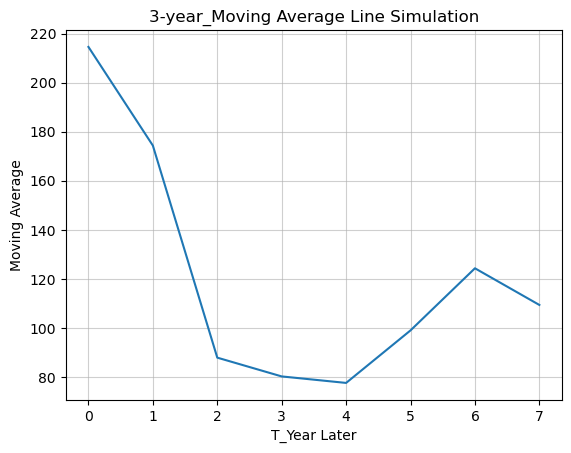

In [29]:
# Example
my_A_stock = Stock(0.03, 0.2, 100, 0.05, 10, 1000)

# prameters T = 5, size & n = 10, seed = 102938, window = 10

T = 5; size = 10; n = 10; seed = 102938; window = 3
price = my_A_stock.stock_price(5, 10, 102938)
print("{}년 후 주식의 가격 : {}".format(T, price))
mean_var = my_A_stock.stock_mean_var(5, 10, 102938)
print("{}년 후 주식의 가격에 대한 표본평균, 표본분산 : {}".format(T, mean_var))
eps_per = my_A_stock.stock_eps_per(5, 10, 102938)
print("{}년 후 주식의 가격에 대한 eps, per : {}".format(T, eps_per))
moving_averages = my_A_stock.stock_moving_average(5, 3, 102938)
print("현재부터 {}년까지의 {}년간의 이동평균 : {}".format(T, window, moving_averages))
my_A_stock.plot_moving_average_line(5, 3, 102938)